In [1]:
import pandas as pd
import numpy as np
import pathlib
import itertools 
import seaborn as sns
import random
from pathlib import Path

In [2]:
import kagglehub

# Download the latest verision
path = kagglehub.dataset_download("berkayalan/retail-sales-data")

print("Path to dataset files:", path)

Path to dataset files: /Users/abhiramsingireddy/.cache/kagglehub/datasets/berkayalan/retail-sales-data/versions/1


In [3]:
# Large data sets may require chunking the data out

# This means using the chunksize arguement. The downside is that it creates an iterator object that is a collection of DataFrames

# The bad news is that we need to use tools, like itertools, to access and work with items in the iterator(we could convert it to a list, but that defeats the purpose)

# The good news is that we can use concat to get the iterator and make one readable DataFrame

In [4]:
retail_sales_dir = pathlib.Path("/Users/abhiramsingireddy/.cache/kagglehub/datasets/berkayalan/retail-sales-data/versions/1")
sales_dir = retail_sales_dir/"sales.csv"
sales_data = sales_dir/"sales.csv"

chunk_size = 100

chunks = pd.read_csv(sales_data, chunksize=chunk_size)

first_chunks = itertools.islice(chunks,0,2) # get the first two chunks of data as two DataFrames

first_chunks_df = pd.concat(first_chunks) # concentrate them to one DataFrame


first_chunks_df

,product_id,store_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2
0,P0001,S0002,2017-01-02,0.0,0.00,8.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
1,P0001,S0012,2017-01-02,1.0,5.30,0.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
2,P0001,S0013,2017-01-02,2.0,10.59,0.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
3,P0001,S0023,2017-01-02,0.0,0.00,6.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
4,P0001,S0025,2017-01-02,0.0,0.00,1.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,P0017,S0062,2017-01-02,2.0,2.76,47.0,1.49,PR14,NaN,PR03,NaN,NaN,NaN
196,P0017,S0063,2017-01-02,0.0,0.00,2.0,1.49,PR14,NaN,PR03,NaN,NaN,NaN
197,P0017,S0066,2017-01-02,1.0,1.38,16.0,1.49,PR14,NaN,PR03,NaN,NaN,NaN
198,P0017,S0067,2017-01-02,0.0,0.00,9.0,1.49,PR14,NaN,PR03,NaN,NaN,NaN


In [5]:
for items in retail_sales_dir.iterdir():
    if items.is_file():
        print(items)

/Users/abhiramsingireddy/.cache/kagglehub/datasets/berkayalan/retail-sales-data/versions/1/store_cities.csv
/Users/abhiramsingireddy/.cache/kagglehub/datasets/berkayalan/retail-sales-data/versions/1/product_hierarchy.csv


In [6]:
# Getting information from the product hierachy csv.

# Using fiter to only get the product rows we want for this exercise.

In [7]:
prod_hier_df = pd.read_csv(retail_sales_dir / "product_hierarchy.csv")

prod_hier_df = prod_hier_df.filter(regex='^product.*')

prod_hier_df

,product_id,product_length,product_depth,product_width
0,P0000,5.0,20.0,12.0
1,P0001,13.5,22.0,20.0
2,P0002,22.0,40.0,22.0
3,P0004,2.0,13.0,4.0
4,P0005,16.0,30.0,16.0
...,...,...,...,...
694,P0744,2.0,7.0,7.0
695,P0745,NaN,NaN,NaN
696,P0746,1.0,1.0,1.0
697,P0747,23.0,23.0,33.3


In [8]:
sales_products_df = pd.merge(first_chunks_df, prod_hier_df, on='product_id')

In [9]:
# Setting the index to show how to merge by index

In [10]:
sales_products_df

,product_id,store_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2,product_length,product_depth,product_width
0,P0001,S0002,2017-01-02,0.0,0.00,8.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN,13.5,22.0,20.0
1,P0001,S0012,2017-01-02,1.0,5.30,0.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN,13.5,22.0,20.0
2,P0001,S0013,2017-01-02,2.0,10.59,0.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN,13.5,22.0,20.0
3,P0001,S0023,2017-01-02,0.0,0.00,6.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN,13.5,22.0,20.0
4,P0001,S0025,2017-01-02,0.0,0.00,1.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN,13.5,22.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,P0017,S0062,2017-01-02,2.0,2.76,47.0,1.49,PR14,NaN,PR03,NaN,NaN,NaN,8.0,28.0,8.0
196,P0017,S0063,2017-01-02,0.0,0.00,2.0,1.49,PR14,NaN,PR03,NaN,NaN,NaN,8.0,28.0,8.0
197,P0017,S0066,2017-01-02,1.0,1.38,16.0,1.49,PR14,NaN,PR03,NaN,NaN,NaN,8.0,28.0,8.0
198,P0017,S0067,2017-01-02,0.0,0.00,9.0,1.49,PR14,NaN,PR03,NaN,NaN,NaN,8.0,28.0,8.0


In [11]:
sales_products_df.head()

,product_id,store_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2,product_length,product_depth,product_width
0,P0001,S0002,2017-01-02,0.0,0.00,8.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN,13.5,22.0,20.0
1,P0001,S0012,2017-01-02,1.0,5.30,0.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN,13.5,22.0,20.0
2,P0001,S0013,2017-01-02,2.0,10.59,0.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN,13.5,22.0,20.0
3,P0001,S0023,2017-01-02,0.0,0.00,6.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN,13.5,22.0,20.0
4,P0001,S0025,2017-01-02,0.0,0.00,1.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN,13.5,22.0,20.0


In [12]:
sales_products_df = sales_products_df.set_index('store_id')

In [13]:
sales_products_df

,product_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2,product_length,product_depth,product_width
store_id,,,,,,,,,,,,,,,
S0002,P0001,2017-01-02,0.0,0.00,8.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN,13.5,22.0,20.0
S0012,P0001,2017-01-02,1.0,5.30,0.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN,13.5,22.0,20.0
S0013,P0001,2017-01-02,2.0,10.59,0.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN,13.5,22.0,20.0
S0023,P0001,2017-01-02,0.0,0.00,6.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN,13.5,22.0,20.0
S0025,P0001,2017-01-02,0.0,0.00,1.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN,13.5,22.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S0062,P0017,2017-01-02,2.0,2.76,47.0,1.49,PR14,NaN,PR03,NaN,NaN,NaN,8.0,28.0,8.0
S0063,P0017,2017-01-02,0.0,0.00,2.0,1.49,PR14,NaN,PR03,NaN,NaN,NaN,8.0,28.0,8.0
S0066,P0017,2017-01-02,1.0,1.38,16.0,1.49,PR14,NaN,PR03,NaN,NaN,NaN,8.0,28.0,8.0


In [14]:
sales_products_df = sales_products_df.set_index('product_id')

In [15]:
sales_products_df

,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2,product_length,product_depth,product_width
product_id,,,,,,,,,,,,,,
P0001,2017-01-02,0.0,0.00,8.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN,13.5,22.0,20.0
P0001,2017-01-02,1.0,5.30,0.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN,13.5,22.0,20.0
P0001,2017-01-02,2.0,10.59,0.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN,13.5,22.0,20.0
P0001,2017-01-02,0.0,0.00,6.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN,13.5,22.0,20.0
P0001,2017-01-02,0.0,0.00,1.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN,13.5,22.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P0017,2017-01-02,2.0,2.76,47.0,1.49,PR14,NaN,PR03,NaN,NaN,NaN,8.0,28.0,8.0
P0017,2017-01-02,0.0,0.00,2.0,1.49,PR14,NaN,PR03,NaN,NaN,NaN,8.0,28.0,8.0
P0017,2017-01-02,1.0,1.38,16.0,1.49,PR14,NaN,PR03,NaN,NaN,NaN,8.0,28.0,8.0


In [16]:
cities_df = pd.read_csv(retail_sales_dir / "store_cities.csv")

In [17]:
cities_df.head()

,store_id,storetype_id,store_size,city_id
0,S0091,ST04,19,C013
1,S0012,ST04,28,C005
2,S0045,ST04,17,C008
3,S0032,ST03,14,C019
4,S0027,ST04,24,C022


In [18]:
import pandas as pd

sales_products_cities_df = pd.merge(sales_products_df,cities_df,left_index=True, right_on='store_id')

In [19]:
sales_products_cities_df.head()

,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2,product_length,product_depth,product_width,store_id,storetype_id,store_size,city_id


In [20]:
# Filtering down again. Note that regex pattern is filtering out any columns that start with the word "promo".

# The regex pattern is as follows:

# 1. ^ means look once, starting from the beginning of the string (rather than character by character)
# 2. () is a character group. This means to look for this character pattern group supplied
# 3. ?! means "exclude" the following pattern

In [21]:
sales_products_cities_df = sales_products_cities_df.filter(regex="^(?!promo)")

In [22]:
sales_products_df

,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2,product_length,product_depth,product_width
product_id,,,,,,,,,,,,,,
P0001,2017-01-02,0.0,0.00,8.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN,13.5,22.0,20.0
P0001,2017-01-02,1.0,5.30,0.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN,13.5,22.0,20.0
P0001,2017-01-02,2.0,10.59,0.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN,13.5,22.0,20.0
P0001,2017-01-02,0.0,0.00,6.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN,13.5,22.0,20.0
P0001,2017-01-02,0.0,0.00,1.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN,13.5,22.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P0017,2017-01-02,2.0,2.76,47.0,1.49,PR14,NaN,PR03,NaN,NaN,NaN,8.0,28.0,8.0
P0017,2017-01-02,0.0,0.00,2.0,1.49,PR14,NaN,PR03,NaN,NaN,NaN,8.0,28.0,8.0
P0017,2017-01-02,1.0,1.38,16.0,1.49,PR14,NaN,PR03,NaN,NaN,NaN,8.0,28.0,8.0


In [23]:
# Creating a series from value counts.

# Converting to a DataFrame.

# Setting the index to remove the multi-index.

In [26]:
pd.DataFrame(sales_products_cities_df['storetype_id'].value_counts())

,count
storetype_id,


In [28]:
pd.DataFrame(sales_products_cities_df['storetype_id'].transpose())

,storetype_id


IndexError: index 0 is out of bounds for axis 0 with size 0

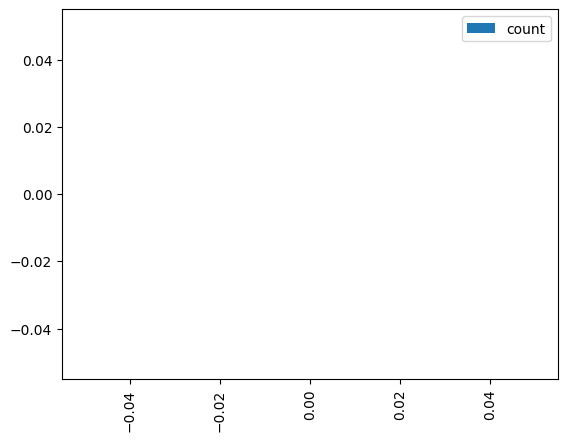

In [43]:
pd.DataFrame(sales_products_cities_df['storetype_id'].value_counts()).plot(kind='bar')

In [44]:
pd.DataFrame(sales_products_cities_df['storetype_id'].value_counts()).transpose()

storetype_id
count


In [45]:
pd.DataFrame(sales_products_cities_df['storetype_id'].value_counts()).transpose().plot(kind='bar')

TypeError: no numeric data to plot

In [48]:
melt_df = pd.read_csv('melt_dataset_1.csv')

In [49]:
melt_df

,Month,Product_A_Sales,Product_B_Sales
0,January,250,150
1,February,300,200
2,March,400,250


In [50]:
melt_df_t = melt_df.set_index('Month').T

In [51]:
melt_df_t

Month,January,February,March
Product_A_Sales,250,300,400
Product_B_Sales,150,200,250


<Axes: xlabel='Month'>

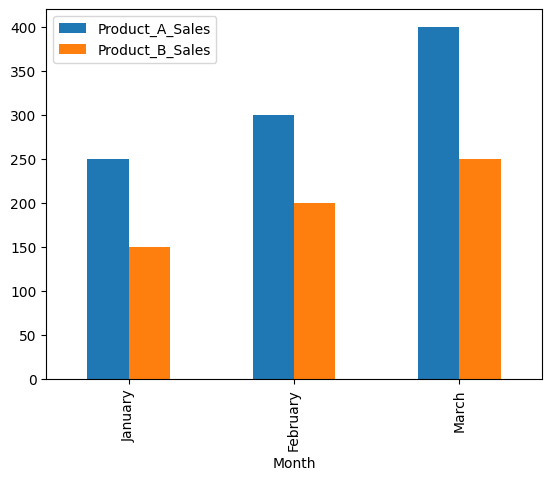

In [52]:
melt_df.set_index('Month').plot(kind='bar')

<Axes: >

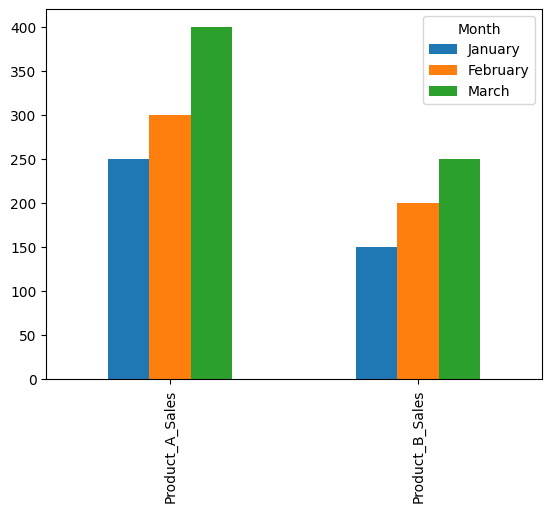

In [55]:
melt_df_t.plot(kind='bar')

<Axes: >

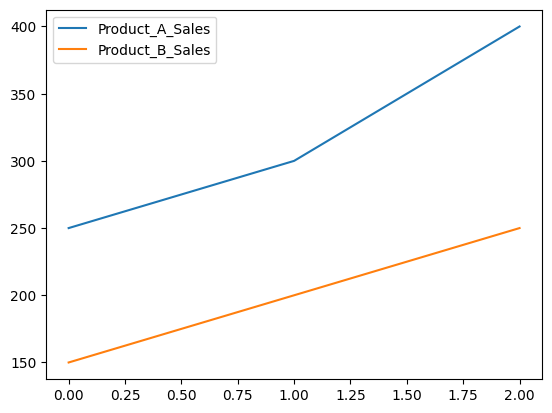

In [54]:
melt_df.plot()

In [56]:
# id_vars = the name of the column that doesn't get changed, but repeated for each group
# vars_name = the name of the column that will take the original column names as its values
# value_name = the name of the column that will hold the values

In [57]:
melted = melt_df.melt(id_vars='Month', var_name='Product', value_name='Sales')

In [58]:
melt_df

,Month,Product_A_Sales,Product_B_Sales
0,January,250,150
1,February,300,200
2,March,400,250


In [59]:
melted

,Month,Product,Sales
0,January,Product_A_Sales,250
1,February,Product_A_Sales,300
2,March,Product_A_Sales,400
3,January,Product_B_Sales,150
4,February,Product_B_Sales,200
5,March,Product_B_Sales,250


<Axes: xlabel='Month', ylabel='Sales'>

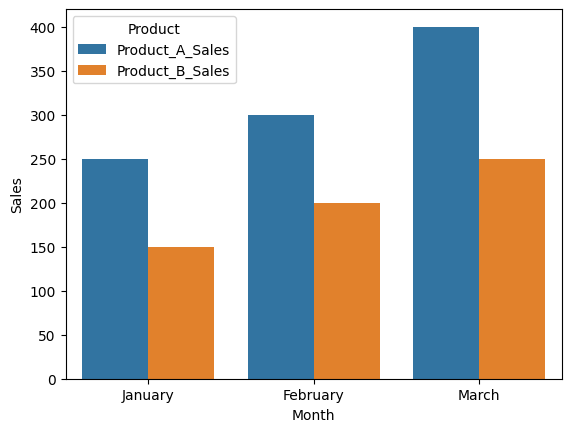

In [60]:
sns.barplot(data = melted, x='Month', y='Sales', hue='Product')

In [62]:
random.seed(1)

rand_vals = [random.randint(1, 1000) for i in range(50)]

cut_df = pd.DataFrame(rand_vals, columns=['rand_vals'])

In [64]:
cut_df

,rand_vals
0,138
1,583
2,868
3,822
4,783
5,65
6,262
7,121
8,508
9,780


In [65]:
# NOTE: sort=False retains the original bin order and isn't sorted based on the value counts

In [66]:
cut_df['bins'] = pd.cut(cut_df['rand_vals'],bins=5)
cut_df['bins'].value_counts(sort=False)

bins
(2.01, 201.0]     11
(201.0, 399.0]     8
(399.0, 597.0]     9
(597.0, 795.0]    11
(795.0, 993.0]    11
Name: count, dtype: int64

In [67]:
cut_df['bins'] = pd.cut(cut_df['rand_vals'],bins=[0,50,100,200,400,500])
cut_df['bins'].value_counts(sort=False)

bins
(0, 50]       6
(50, 100]     2
(100, 200]    3
(200, 400]    9
(400, 500]    5
Name: count, dtype: int64

In [68]:
cut_df['bins'] = pd.cut(cut_df['rand_vals'],bins=[0,50,100,200,400,800])
cut_df['bins'].value_counts(sort=False)

bins
(0, 50]        6
(50, 100]      2
(100, 200]     3
(200, 400]     9
(400, 800]    19
Name: count, dtype: int64

In [70]:
cut_df['qbins'] = pd.qcut(cut_df['rand_vals'],5, labels=['grp1', 'grp2', 'grp3', 'grp4', 'grp5'])
cut_df['qbins'].value_counts(sort=False)

qbins
grp1    10
grp2    10
grp3    10
grp4    10
grp5    10
Name: count, dtype: int64

In [75]:
# cut_df

In [76]:
# cut_df[['qbins', 'rand_vals']].sort_values(by=['qbins', 'rand_vals'])

In [79]:
cut_df.groupby('qbins', observed=False)['rand_vals'].agg(['min', 'max', 'mean'])

,min,max,mean
qbins,,,
grp1,3,121,51.3
grp2,138,400,285.1
grp3,444,623,522.1
grp4,666,808,742.7
grp5,822,993,903.3


In [81]:
cut_df[cut_df['qbins']=='grp2']

,rand_vals,bins,qbins
0,138,"(100, 200]",grp2
6,262,"(200, 400]",grp2
13,389,"(200, 400]",grp2
15,215,"(200, 400]",grp2
21,400,"(200, 400]",grp2
29,273,"(200, 400]",grp2
32,235,"(200, 400]",grp2
37,326,"(200, 400]",grp2
46,391,"(200, 400]",grp2
48,222,"(200, 400]",grp2


In [85]:
sales_products_cities_df['city_id'].value_counts().rank(ascending=False)

Series([], Name: count, dtype: float64)

In [87]:
explode_df = pd.read_csv('explode_demo_dataset.csv')
explode_df

,id,names,scores
0,1,"['Alice', 'Bob']","[85, 90]"
1,2,"['Charlie', 'David', 'Eve']","[78, 88, 92]"
2,3,['Frank'],[95]
3,4,"['Grace', 'Hank', 'Ivy']","[70, 75, 80]"
4,5,['Jack'],[60]


In [88]:
# IMPORTANT: Because explode only works on lists and tuples, and read_csv will make values strings, you have to convert the values to a list or tuple.

# The eval() function evaluates the object and determines if it is a list or tuple (based on the syntax) and will convert it accordingly.

# Therfore, the column has to be updated first, applying a data type conversion first, then using explode.

In [89]:
explode_df['names'] = explode_df['names'].apply(eval)

In [90]:
type(explode_df['names'][0])

list

In [91]:
explode_df

,id,names,scores
0,1,"[Alice, Bob]","[85, 90]"
1,2,"[Charlie, David, Eve]","[78, 88, 92]"
2,3,[Frank],[95]
3,4,"[Grace, Hank, Ivy]","[70, 75, 80]"
4,5,[Jack],[60]


In [92]:
explode_df_exploded = explode_df.explode('names')

In [93]:
explode_df_exploded

,id,names,scores
0,1,Alice,"[85, 90]"
0,1,Bob,"[85, 90]"
1,2,Charlie,"[78, 88, 92]"
1,2,David,"[78, 88, 92]"
1,2,Eve,"[78, 88, 92]"
2,3,Frank,[95]
3,4,Grace,"[70, 75, 80]"
3,4,Hank,"[70, 75, 80]"
3,4,Ivy,"[70, 75, 80]"
4,5,Jack,[60]


In [94]:
def get_avg(x):
    x = eval(x)
    return np.mean(x)

explode_df_exploded['group_avg'] = explode_df_exploded['scores'].map(lambda x: np.mean(eval(x)))

In [95]:
explode_df_exploded

,id,names,scores,group_avg
0,1,Alice,"[85, 90]",87.5
0,1,Bob,"[85, 90]",87.5
1,2,Charlie,"[78, 88, 92]",86.0
1,2,David,"[78, 88, 92]",86.0
1,2,Eve,"[78, 88, 92]",86.0
2,3,Frank,[95],95.0
3,4,Grace,"[70, 75, 80]",75.0
3,4,Hank,"[70, 75, 80]",75.0
3,4,Ivy,"[70, 75, 80]",75.0
4,5,Jack,[60],60.0
